BÀI THỰC HÀNH PHẦN KERNEL SUPPORT VECTOR MACHINE 

VIDU1:

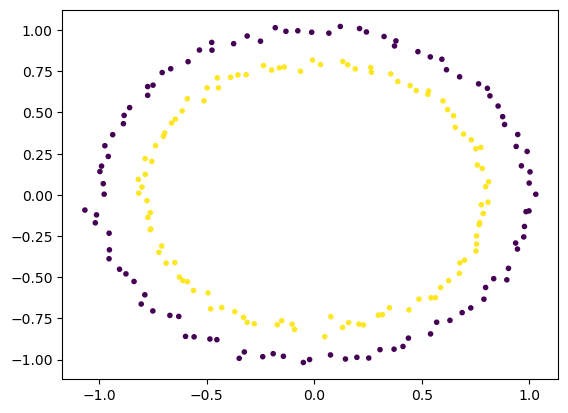

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from matplotlib.backends.backend_pdf import PdfPages 
from sklearn.datasets import make_circles 
# Generate dataset and targets 
X, Y = make_circles(n_samples = 200, noise = 0.02) 
  
# visualizing data 
plt.scatter(X[:, 0], X[:, 1], c = Y, marker = '.') 
plt.show() 

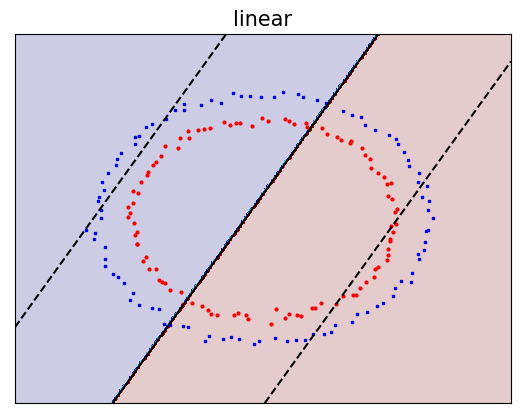

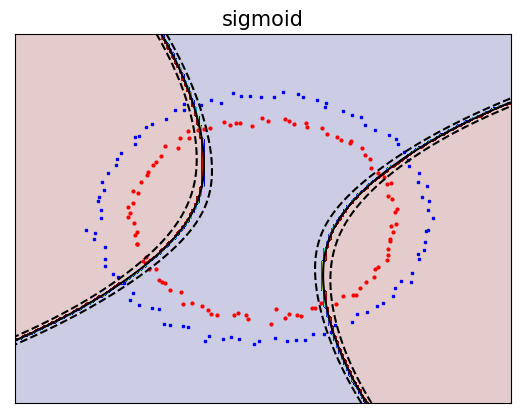

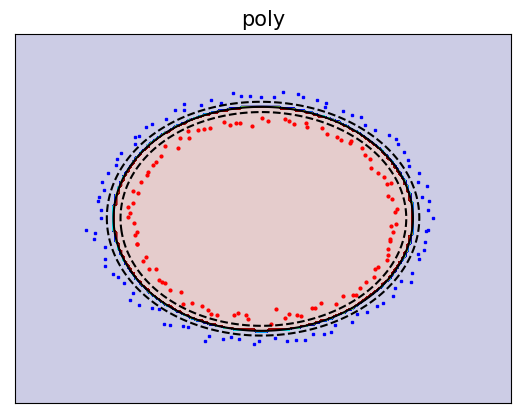

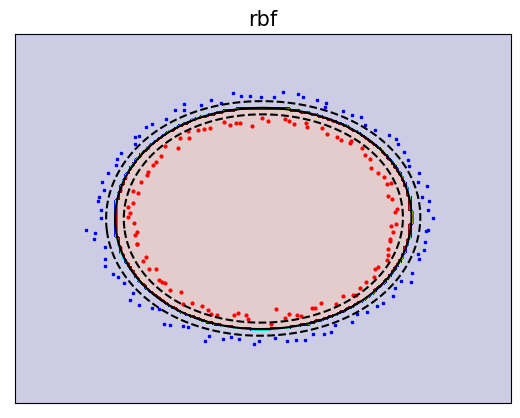

In [2]:
fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
    # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
        facecolors='None')
        plt.plot(X[Y==0, 0], X[Y==0, 1], 'bs', markersize = 2)
        plt.plot(X[Y==1, 0], X[Y==1, 1], 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
        levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

Baitap1:Sử dụng thư viện để đưa ra độ chính xác Accuracy và ma trận nhầm lẫn Confusion Matrix theo mỗi
phương pháp

In [3]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:" ,accuracy_score(y_test, y_pred))
    print("Confusion:", confusion_matrix(y_test, y_pred))

Accuracy: 0.475
Confusion: [[ 0 21]
 [ 0 19]]
Accuracy: 0.55
Confusion: [[14  7]
 [11  8]]
Accuracy: 1.0
Confusion: [[21  0]
 [ 0 19]]
Accuracy: 1.0
Confusion: [[21  0]
 [ 0 19]]


VIDU2

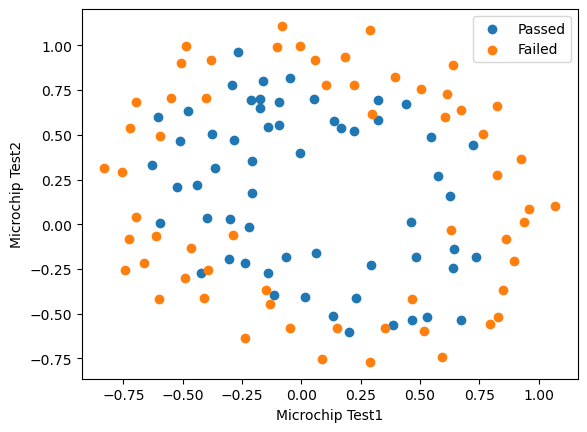

In [4]:
import matplotlib.pyplot as plt
from sklearn import svm
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

data = pd.read_csv('C:\\Users\\TGDD\\Desktop\\học máy\\Support Vector Machine -Kernel\\ex2data2.txt', header = None)
# visualizing data

X = data.iloc[:, 0:2]
Y = data.iloc[:, 2]

mask = Y == 1
passed = plt.scatter(X[mask][0].values, X[mask][1].values)
failed = plt.scatter(X[~mask][0].values, X[~mask][1].values)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()

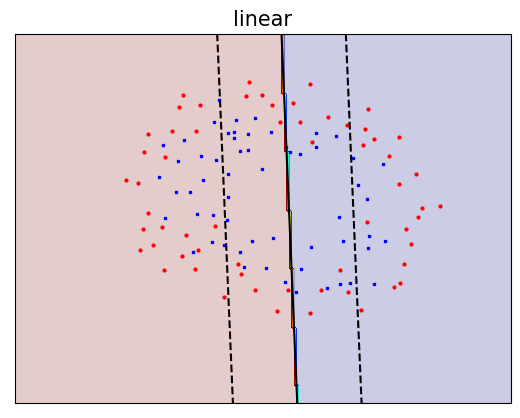

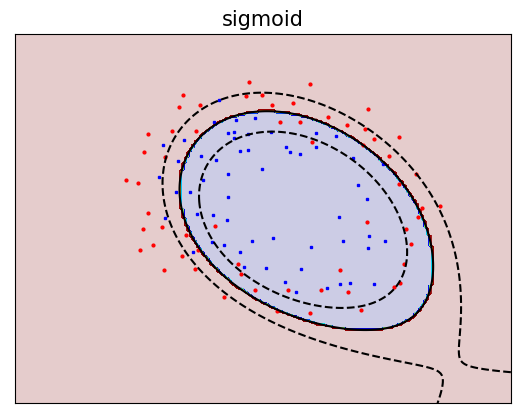

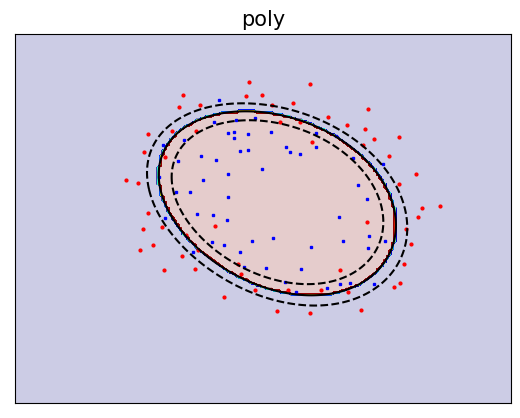

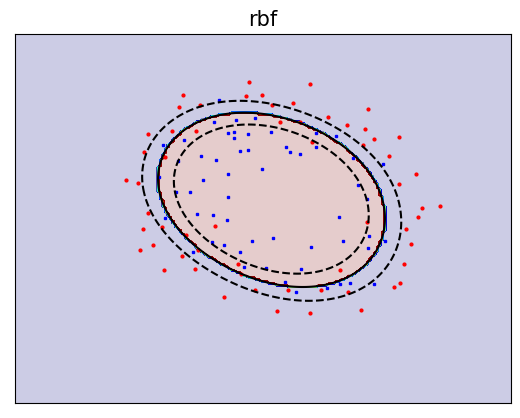

In [5]:
fignum = 1
# fit the model
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X, Y)
    with PdfPages(kernel + '3.pdf') as pdf:
        # plot the line, the points, and the nearest vectors to the plane
        fig, ax = plt.subplots()
        plt.figure(fignum, figsize=(5, 5))
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
        facecolors='None')
        plt.plot(X[mask][0].values, X[mask][1].values, 'bs', markersize = 2)
        plt.plot(X[~mask][0].values, X[~mask][1].values, 'ro', markersize = 2)
        plt.axis('tight')
        x_min = -1.5
        x_max = 1.5
        y_min = -1.5
        y_max = 1.5
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(5, 5))
        CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],

        levels=[-.5, 0, .5])
        plt.title(kernel, fontsize = 15)
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1
        pdf.savefig()
plt.show()

Bài tập tự thực hành 1. Cho tệp dữ liệu đính kèm ARgender.mat, đoạn lệnh sau đây sẽ đọc tệp dữ liệu đó và
chia làm hai phần dữ liệu Training và Test Data.

In [6]:
import scipy.io as sio
from sklearn.svm import SVC
A = sio.loadmat('C:\\Users\\TGDD\\Desktop\\học máy\\Support Vector Machine -Kernel\\ARgender.mat')
X_train = A['Y_train'].T
X_test = A['Y_test'].T
print(X_train.shape)
N = 700
y_train = A['label_train'].reshape(N)
y_test = A['label_test'].reshape(N)

(700, 300)


In [7]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:" ,accuracy_score(y_test, y_pred))
    print("Confusion:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9028571428571428
Confusion:
 [[344   6]
 [ 62 288]]
Accuracy: 0.8942857142857142
Confusion:
 [[342   8]
 [ 66 284]]
Accuracy: 0.9228571428571428
Confusion:
 [[330  20]
 [ 34 316]]
Accuracy: 0.9085714285714286
Confusion:
 [[341   9]
 [ 55 295]]


Bài tập tự thực hành 2. Cho tệp dữ liệu đính kèm dataset.csv, đoạn lệnh sau đây sẽ đọc tệp dữ liệu đó và chia
làm hai phần dữ liệu Training và Test Data.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('C:\\Users\\TGDD\\Desktop\\học máy\\Support Vector Machine -Kernel\\dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Chuyển vị ma trận dữ liệu do ta đọc bằng Pandas => mỗi record là 1 dong
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

In [9]:
for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(XTrain, yTrain)
    y_pred = clf.predict(XTest)
    print("Accuracy:" ,accuracy_score(yTest, y_pred))
    print("Confusion:\n", confusion_matrix(yTest, y_pred))

Accuracy: 0.9
Confusion:
 [[66  2]
 [ 8 24]]
Accuracy: 0.7
Confusion:
 [[53 15]
 [15 17]]
Accuracy: 0.93
Confusion:
 [[64  4]
 [ 3 29]]
Accuracy: 0.93
Confusion:
 [[64  4]
 [ 3 29]]


Bài tập tự thực hành 3. Hãy thực hiện các yêu cầu như hai bài tập tự thực hành 1 và 2 với bài toán phân loại
tập dữ liệu ung thư vú.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
# Breast cancer dataset for classification
data = load_breast_cancer()
print (data.feature_names)
print (data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [11]:
X = data.data
y = data.target

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.transform(XTest)

for kernel in ('linear','sigmoid', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=1, coef0 = 1)
    clf.fit(XTrain, yTrain)
    y_pred = clf.predict(XTest)
    print("Accuracy:" ,accuracy_score(yTest, y_pred))
    print("Confusion:\n", confusion_matrix(yTest, y_pred))

Accuracy: 0.972027972027972
Confusion:
 [[51  2]
 [ 2 88]]
Accuracy: 0.8951048951048951
Confusion:
 [[45  8]
 [ 7 83]]
Accuracy: 0.9440559440559441
Confusion:
 [[49  4]
 [ 4 86]]
Accuracy: 0.6293706293706294
Confusion:
 [[ 0 53]
 [ 0 90]]
